
# DATASET : Karnataka Agricultural Market Data for 2012
# Dataset Description

This dataset contains information about agricultural markets, commodities, and their arrivals across various districts and taluks.
It provides insights into the regional distribution of agricultural trade, seasonal variations, and market performance.
Each record represents details for a specific market, commodity, and time period (month and year).

# Column Descriptions
District Name – Represents the name of the district where the market is located. It helps in analyzing data region-wise.

Taluk Name – Indicates the taluk or subdivision within a district. Useful for more localized analysis.

Market Name – Specifies the name of the agricultural market or mandi where the commodity is traded.

Address – Gives the physical address of the market. It can be used for mapping or reference purposes.

Telephone – Contains the contact number of the market or its administrative office.

Commodity – Refers to the agricultural produce or product traded (e.g., rice, wheat, onions).

Year – Represents the year in which the data was recorded, useful for studying long-term trends.

Month – Denotes the month corresponding to the data entry, used for identifying seasonal patterns.

Arrival – Shows the quantity of the commodity that arrived at the market during the given month and year.

Unit – Specifies the measurement unit of the arrival quantity (e.g., quintals, kilograms, tons).

# Purpose of the Dataset
To analyze agricultural market performance across regions and time periods.

To identify seasonal trends in commodity arrivals.

To evaluate commodity-wise production and distribution patterns.

To help in forecasting demand and supply trends in agricultural commodities.

To support data-driven policy decisions in agriculture and market management.

In [1]:
import findspark
findspark.init()
import pyspark
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName("KARNATAKA").getOrCreate()

# Load your dataset
df = spark.read.csv("datafile (1).csv", header=True, inferSchema=True)
spark

# Explanation: Initializes findspark so that Spark can be located and used inside this Python environment.

In [3]:
df.printSchema()

root
 |-- District Name: string (nullable = true)
 |-- Taluk Name: string (nullable = true)
 |-- Market Name: string (nullable = true)
 |-- Address: string (nullable = true)
 |-- Telephone: string (nullable = true)
 |-- Commodity: string (nullable = true)
 |-- Year: integer (nullable = true)
 |-- Month: string (nullable = true)
 |-- Arrival: integer (nullable = true)
 |-- Unit: string (nullable = true)



# Explanation: Prints the schema of the DataFrame to show all column names and their data types.

In [5]:
df.show(5)

+-------------+----------+-----------+--------------------+---------+---------+----+-----+-------+----------+
|District Name|Taluk Name|Market Name|             Address|Telephone|Commodity|Year|Month|Arrival|      Unit|
+-------------+----------+-----------+--------------------+---------+---------+----+-----+-------+----------+
|    Bagalakot|    Badami|     BADAMI|SECRATRY A.P.M.C....|   220042|    Bajra|2012|  Jan|    242|Quintal   |
|    Bagalakot|    Badami|     BADAMI|SECRATRY A.P.M.C....|   220042|   Bull  |2012|  Jan|     65|  Numbers |
|    Bagalakot|    Badami|     BADAMI|SECRATRY A.P.M.C....|   220042|    Cow  |2012|  Jan|    151|  Numbers |
|    Bagalakot|    Badami|     BADAMI|SECRATRY A.P.M.C....|   220042|   Goat  |2012|  Jan|    492|  Numbers |
|    Bagalakot|    Badami|     BADAMI|SECRATRY A.P.M.C....|   220042|Groundnut|2012|  Jan|    364|Quintal   |
+-------------+----------+-----------+--------------------+---------+---------+----+-----+-------+----------+
only showi

# Displays a small sample of rows from the DataFrame in a tabular format for quick inspection.

In [7]:
from pyspark.sql.functions import col, regexp_replace

# Imports necessary libraries or modules which provide Spark, Pandas, or visualization functionality.

In [7]:
from pyspark.sql.functions import mean, col

# Check for nulls
df.select([col(c).isNull().alias(c) for c in df.columns]).show()

# Fill null numeric columns with mean
numeric_cols = [f.name for f in df.schema.fields if f.dataType.simpleString() in ['int', 'double', 'float']]
for c in numeric_cols:
    mean_val = df.select(mean(col(c))).collect()[0][0]
    df = df.na.fill({c: mean_val})

# Drop rows with any null values
df_cleaned = df.na.drop()

# Rename a column
df_renamed = df_cleaned.withColumnRenamed(df_cleaned.columns[0], "NewName")

# Remove duplicates
df_unique = df_renamed.dropDuplicates()
df

+-------------+----------+-----------+-------+---------+---------+-----+-----+-------+-----+
|District Name|Taluk Name|Market Name|Address|Telephone|Commodity| Year|Month|Arrival| Unit|
+-------------+----------+-----------+-------+---------+---------+-----+-----+-------+-----+
|        false|     false|      false|  false|    false|    false|false|false|  false|false|
|        false|     false|      false|  false|    false|    false|false|false|  false|false|
|        false|     false|      false|  false|    false|    false|false|false|  false|false|
|        false|     false|      false|  false|    false|    false|false|false|  false|false|
|        false|     false|      false|  false|    false|    false|false|false|  false|false|
|        false|     false|      false|  false|    false|    false|false|false|  false|false|
|        false|     false|      false|  false|    false|    false|false|false|  false|false|
|        false|     false|      false|  false|    false|    false|fals

DataFrame[District Name: string, Taluk Name: string, Market Name: string, Address: string, Telephone: string, Commodity: string, Year: int, Month: string, Arrival: int, Unit: string]

# checks for null values, fills missing numeric values with their mean, removes remaining nulls, renames the first column, and drops duplicate rows to create a clean dataset.


In [13]:
# Select key columns
df.select("District Name", "Market Name", "Commodity", "Arrival").show(5)

# Filter records for a specific year
df.filter(col("Year") == 2024).show(5)

# Filter by Commodity type (example: “Tomato”)
df.filter(col("Commodity") == "Tomato").show(5)

# Filter where Arrival > 1000
df.filter(col("Arrival") > 1000).show(5)


+----------------+----------------+---------+-------+
|   District Name|     Market Name|Commodity|Arrival|
+----------------+----------------+---------+-------+
|       Bagalakot|        JAMKANDI|   Goat  |      2|
|       Bagalakot|        JAMKANDI|    Cow  |     31|
|Bangalore Urban•|       BANGALORE|    Onion| 362996|
|Bangalore Urban•|       BANGALORE|  Soapnut|      0|
|Bangalore Urban•|BINNY MILL (F&V)| Cucumbar|   7866|
+----------------+----------------+---------+-------+
only showing top 5 rows
+-------------+----------+-----------+-------+---------+---------+----+-----+-------+----+
|District Name|Taluk Name|Market Name|Address|Telephone|Commodity|Year|Month|Arrival|Unit|
+-------------+----------+-----------+-------+---------+---------+----+-----+-------+----+
+-------------+----------+-----------+-------+---------+---------+----+-----+-------+----+

+-------------+-----------+-----------+--------------------+-----------+---------+----+-----+-------+----------+
|District Na

# Selects key columns and filters rows where Year = 2024, Commodity = Tomato, and Arrival > 1000, then shows 5 rows.

In [15]:
from pyspark.sql.functions import avg, sum, count

# Average arrival per commodity
df.groupBy("Commodity").agg(avg("Arrival").alias("Avg_Arrival")).show()

# Total arrival per district
df.groupBy("District Name").agg(sum("Arrival").alias("Total_Arrival")).show()

# Count of markets in each district
df.groupBy("District Name").agg(count("Market Name").alias("Market_Count")).show()


+----------------+------------------+
|       Commodity|       Avg_Arrival|
+----------------+------------------+
|           Cow  |115.94088669950739|
|        Arecanut|  6271.40465116279|
|          Papaya| 726.3802816901408|
|         Sesamum|401.34513274336285|
|           Arhar|40.733333333333334|
|      Bengalgram|2302.4239130434785|
|Mango (Raw-Ripe)| 9432.421052631578|
|       Ash Gourd| 551.8333333333334|
|       Thondekai| 397.0617283950617|
|          Bamboo|             172.0|
|       Safflower|165.31007751937983|
|         Mustard|             532.5|
|           Ram  | 228.9655172413793|
| Green Avare (W)|477.65671641791045|
|    Banana Green|1047.8413173652696|
|    Other Fruits|             517.5|
|            Rose| 69.83333333333333|
|        Mousambi| 11224.48076923077|
|          Orange| 5691.174603174603|
|           Beans| 740.1221374045801|
+----------------+------------------+
only showing top 20 rows
+----------------+-------------+
|   District Name|Total_Arriva

# Calculates average Arrival per Commodity,Calculates total Arrival per District,Counts the number of Markets in each District.

In [17]:
from pyspark.sql.functions import when, upper

# Add column categorizing Arrival volume
df = df.withColumn("Arrival_Level",
                   when(col("Arrival") > 1000, "High")
                   .when(col("Arrival").between(500, 1000), "Medium")
                   .otherwise("Low"))

# Create an uppercase version of the commodity name
df = df.withColumn("Commodity_Upper", upper(col("Commodity")))

# Rename column for clarity
df = df.withColumnRenamed("District Name", "District_Name")


# Adds Arrival_Level column categorizing Arrival as High, Medium, or Low.

# Creates Commodity_Upper column with uppercase commodity names.

In [19]:
from pyspark.sql.window import Window
from pyspark.sql.functions import rank

# Rank commodities within each district based on Arrival
windowSpec = Window.partitionBy("District_Name").orderBy(col("Arrival").desc())

df_ranked = df.withColumn("Rank_in_District", rank().over(windowSpec))
df_ranked.select("District_Name", "Commodity", "Arrival", "Rank_in_District").show(10)


+-------------+---------+-------+----------------+
|District_Name|Commodity|Arrival|Rank_in_District|
+-------------+---------+-------+----------------+
|    Bagalakot|    Maize|  74916|               1|
|    Bagalakot|Groundnut|  63347|               2|
|    Bagalakot|    Bajra|  51312|               3|
|    Bagalakot|Groundnut|  50003|               4|
|    Bagalakot|    Maize|  34790|               5|
|    Bagalakot|    Onion|  32024|               6|
|    Bagalakot|    Onion|  28596|               7|
|    Bagalakot|    Bajra|  27330|               8|
|    Bagalakot|  Jaggery|  27060|               9|
|    Bagalakot|  Jaggery|  26408|              10|
+-------------+---------+-------+----------------+
only showing top 10 rows


# Ranks commodities within each district by Arrival in descending order and shows the top 10 with their ranks.

In [23]:
# Pivot: show total arrival of each commodity per month
df.groupBy("Commodity").pivot("Month").sum("Arrival").show(5)


+---------+------+-----+------+------+-------+------+------+------+------+------+------+-----+
|Commodity|   Apr|  Aug|   Dec|   Feb|    Jan|   Jul|   Jun|   Mar|   May|   Nov|   Oct|  Sep|
+---------+------+-----+------+------+-------+------+------+------+------+------+------+-----+
|    Cow  |  1557| 2349|  2143|  1495|   1515|  2446|  1910|  1908|  1595|  1771|  2578| 2269|
| Arecanut|158084|98993|191719|194281|1095873|120911|110149|235257|144334|130877|129446|86780|
|   Papaya|  3080| 5952|  4866|  5496|   5443|  4256|  3246|  4284|  2909|  3695|  3203| 5143|
|  Sesamum|   435| 4168|  3006|  2180|   1720|  1078|   684|   488|   471|  8076|  8789|14257|
|    Arhar|    76|   25|     4|    87|     89|   137|    14|    83|    68|     8|     3|   17|
+---------+------+-----+------+------+-------+------+------+------+------+------+------+-----+
only showing top 5 rows


# Displays total Arrival of each Commodity per Month in a pivoted format, showing the first 5 rows.

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


# Importing specific libraries

In [29]:
# Convert PySpark DataFrame to Pandas
pdf = df.toPandas()
pdf_ranked = df_ranked.toPandas()


# Converts PySpark DataFrames df and df_ranked into Pandas DataFrames for easier analysis.

C:\Users\manku\AppData\Local\Temp\ipykernel_13628\4081487191.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="District_Name", y="Arrival", data=arrival_by_district, palette="viridis")


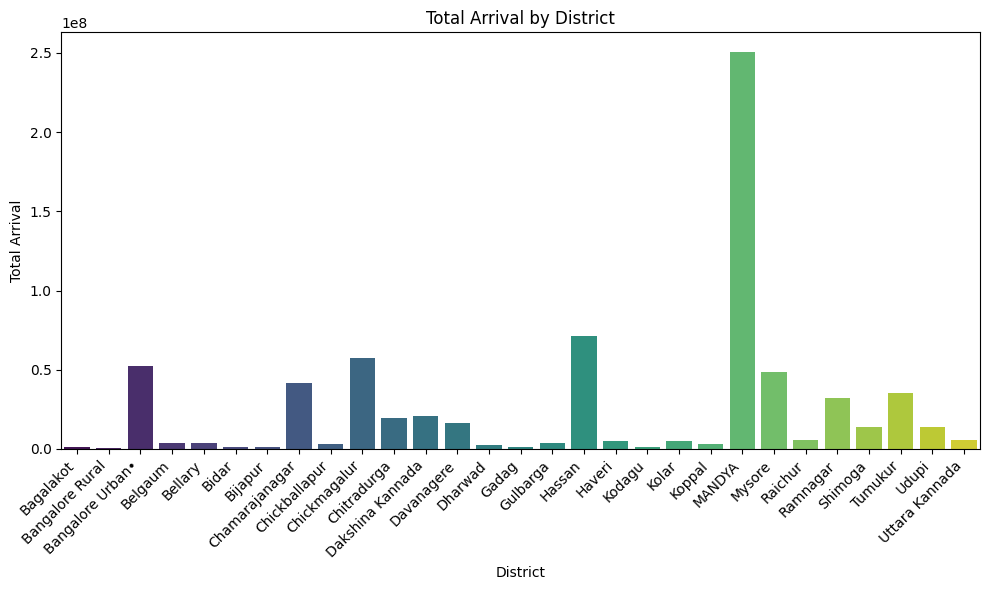

In [31]:
arrival_by_district = pdf.groupby("District_Name")["Arrival"].sum().reset_index()

plt.figure(figsize=(10,6))
sns.barplot(x="District_Name", y="Arrival", data=arrival_by_district, palette="viridis")
plt.xticks(rotation=45, ha='right')
plt.title("Total Arrival by District")
plt.xlabel("District")
plt.ylabel("Total Arrival")
plt.tight_layout()
plt.show()


# Plots a bar chart showing the total Arrival for each district.

C:\Users\manku\AppData\Local\Temp\ipykernel_13628\1379441205.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Commodity", y="Arrival", data=avg_arrival, palette="coolwarm")


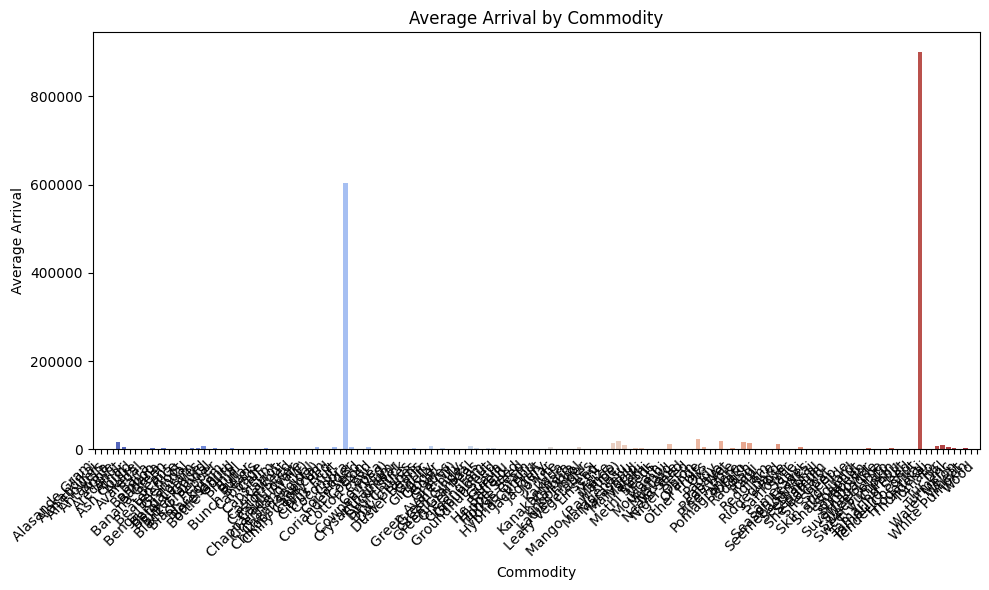

In [33]:
avg_arrival = pdf.groupby("Commodity")["Arrival"].mean().reset_index()

plt.figure(figsize=(10,6))
sns.barplot(x="Commodity", y="Arrival", data=avg_arrival, palette="coolwarm")
plt.xticks(rotation=45, ha='right')
plt.title("Average Arrival by Commodity")
plt.xlabel("Commodity")
plt.ylabel("Average Arrival")
plt.tight_layout()
plt.show()


# Plots a bar chart showing the average Arrival for each commodity.

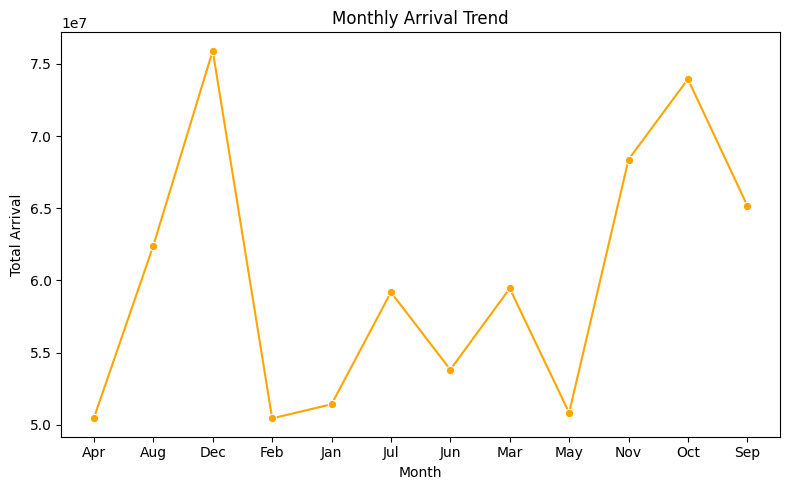

In [35]:
monthly_arrival = pdf.groupby("Month")["Arrival"].sum().reset_index()

plt.figure(figsize=(8,5))
sns.lineplot(x="Month", y="Arrival", data=monthly_arrival, marker="o", color="orange")
plt.title("Monthly Arrival Trend")
plt.xlabel("Month")
plt.ylabel("Total Arrival")
plt.tight_layout()
plt.show()


# Plots a line chart showing the trend of total Arrival for each month.

C:\Users\manku\AppData\Local\Temp\ipykernel_13628\3737252102.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Commodity", y="Arrival", data=pdf, palette="Set2")


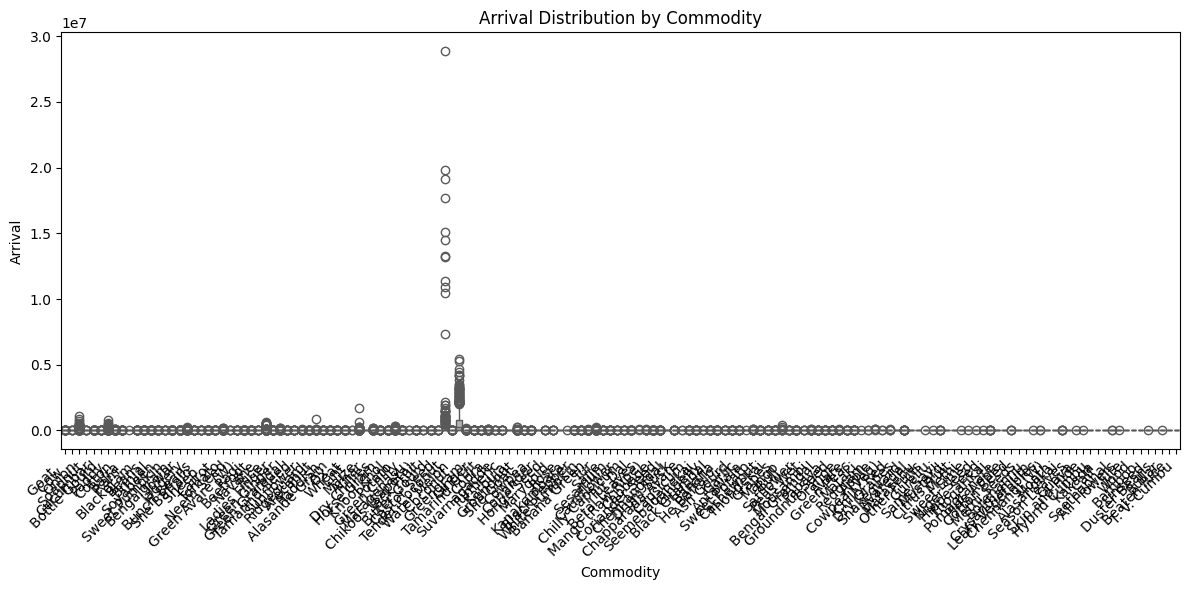

In [37]:
plt.figure(figsize=(12,6))
sns.boxplot(x="Commodity", y="Arrival", data=pdf, palette="Set2")
plt.xticks(rotation=45, ha='right')
plt.title("Arrival Distribution by Commodity")
plt.tight_layout()
plt.show()


# Plots a boxplot showing the distribution of Arrival for each commodity.

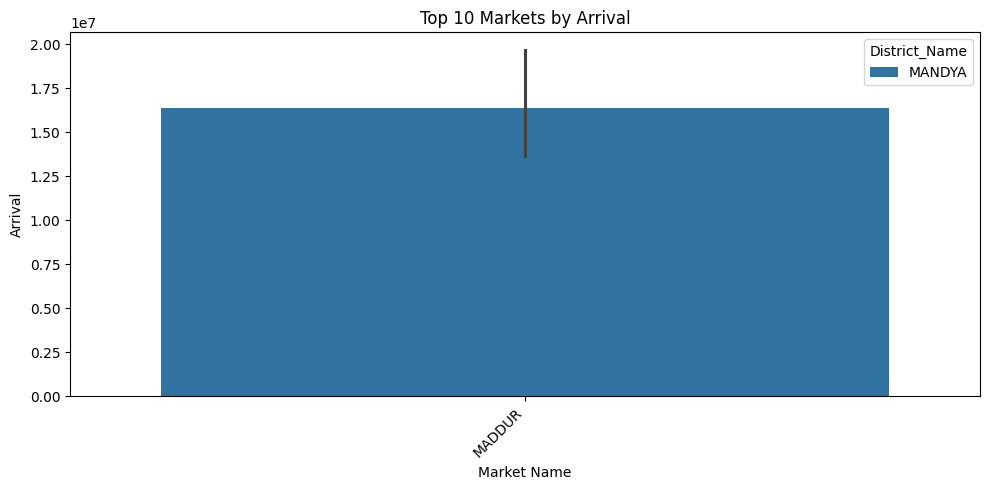

In [39]:
top_markets = pdf_ranked.sort_values(by="Arrival", ascending=False).head(10)

plt.figure(figsize=(10,5))
sns.barplot(x="Market Name", y="Arrival", data=top_markets, hue="District_Name", dodge=False)
plt.xticks(rotation=45, ha='right')
plt.title("Top 10 Markets by Arrival")
plt.xlabel("Market Name")
plt.ylabel("Arrival")
plt.tight_layout()
plt.show()


# Plots a bar chart of the top 10 markets by Arrival, colored by district.


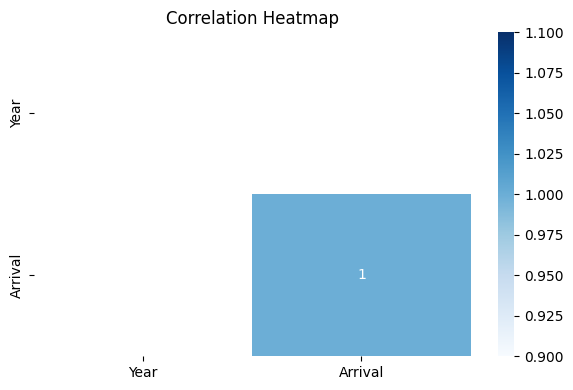

In [41]:
plt.figure(figsize=(6,4))
sns.heatmap(pdf[["Year", "Arrival"]].corr(), annot=True, cmap="Blues")
plt.title("Correlation Heatmap")
plt.tight_layout()
plt.show()


# Plots a heatmap showing the correlation between Year and Arrival.


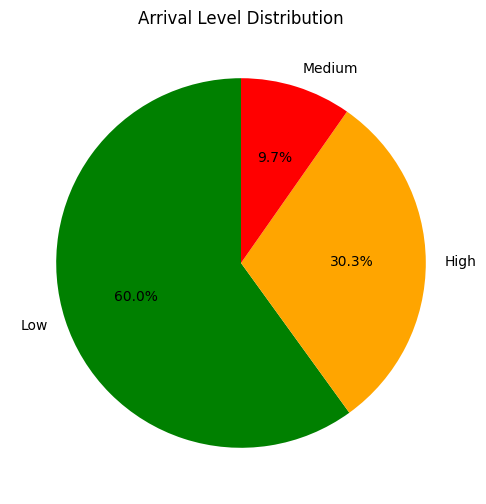

In [43]:
arrival_level_counts = pdf["Arrival_Level"].value_counts()

plt.figure(figsize=(6,6))
plt.pie(arrival_level_counts, labels=arrival_level_counts.index, autopct='%1.1f%%', startangle=90, colors=["green", "orange", "red"])
plt.title("Arrival Level Distribution")
plt.show()


# Plots a pie chart showing the percentage distribution of Arrival levels (High, Medium, Low).


In [45]:
plt.savefig("arrival_analysis.png", dpi=300, bbox_inches='tight')


<Figure size 640x480 with 0 Axes>

# Saves the current plot as a high-resolution PNG file named `arrival_analysis.png`.


In [49]:
df.count()

21421

# Returns the total number of rows in the DataFrame `df`.


In [53]:
# Display schema
df.printSchema()

# Show top 10 rows
df.show(10)

# Get column names
print(df.columns)

# Count total records
print("Total records:", df.count())


root
 |-- District_Name: string (nullable = true)
 |-- Taluk Name: string (nullable = true)
 |-- Market Name: string (nullable = true)
 |-- Address: string (nullable = true)
 |-- Telephone: string (nullable = true)
 |-- Commodity: string (nullable = true)
 |-- Year: integer (nullable = true)
 |-- Month: string (nullable = true)
 |-- Arrival: integer (nullable = true)
 |-- Unit: string (nullable = true)
 |-- Arrival_Level: string (nullable = false)
 |-- Commodity_Upper: string (nullable = true)

+----------------+---------------+----------------+--------------------+-----------+------------+----+-----+-------+----------+-------------+---------------+
|   District_Name|     Taluk Name|     Market Name|             Address|  Telephone|   Commodity|Year|Month|Arrival|      Unit|Arrival_Level|Commodity_Upper|
+----------------+---------------+----------------+--------------------+-----------+------------+----+-----+-------+----------+-------------+---------------+
|       Bagalakot|      Ja

# Displays schema, first 10 rows, column names, and total record count of the DataFrame.


In [55]:
# Basic summary statistics for numeric columns
df.describe().show()

# Compute mean, min, max, stddev for Arrival
from pyspark.sql.functions import mean, min, max, stddev

df.select(
    mean("Arrival").alias("Mean_Arrival"),
    min("Arrival").alias("Min_Arrival"),
    max("Arrival").alias("Max_Arrival"),
    stddev("Arrival").alias("StdDev_Arrival")
).show()


+-------+--------------+----------+-----------+--------------------+-------------------+-------------+------+-----+------------------+---------+-------------+---------------+
|summary| District_Name|Taluk Name|Market Name|             Address|          Telephone|    Commodity|  Year|Month|           Arrival|     Unit|Arrival_Level|Commodity_Upper|
+-------+--------------+----------+-----------+--------------------+-------------------+-------------+------+-----+------------------+---------+-------------+---------------+
|  count|         21421|     21421|      21421|               21421|              21421|        21421| 21421|21421|             21421|    21421|        21421|          21421|
|   mean|          NULL|      NULL|       NULL|                NULL|6.129803628281474E9|         NULL|2012.0| NULL|33677.881378086924|     NULL|         NULL|           NULL|
| stddev|          NULL|      NULL|       NULL|                NULL|3.608873875057577E9|         NULL|   0.0| NULL|  424756.2

# Shows basic summary statistics for all numeric columns and calculates mean, min, max, and standard deviation specifically for Arrival.


In [57]:
arrival_by_district = df.groupBy("District_Name").sum("Arrival").orderBy("sum(Arrival)", ascending=False)
arrival_by_district.show()


+----------------+------------+
|   District_Name|sum(Arrival)|
+----------------+------------+
|          MANDYA|   250486403|
|          Hassan|    71459471|
|    Chickmagalur|    57494115|
|Bangalore Urban•|    52629807|
|          Mysore|    48436311|
|  Chamarajanagar|    41717646|
|         Tumukur|    35055989|
|        Ramnagar|    32010150|
|Dakshina Kannada|    20791381|
|     Chitradurga|    19711306|
|      Davanagere|    16134052|
|           Udupi|    13937260|
|         Shimoga|    13881652|
|  Uttara Kannada|     5865757|
|         Raichur|     5560508|
|           Kolar|     5029149|
|          Haveri|     4710132|
|         Belgaum|     4000970|
|         Bellary|     3769220|
|        Gulbarga|     3583473|
+----------------+------------+
only showing top 20 rows


# Groups data by District_Name, calculates total Arrival per district, sorts in descending order, and displays the result.


In [59]:
avg_arrival_by_commodity = df.groupBy("Commodity").avg("Arrival").orderBy("avg(Arrival)", ascending=False)
avg_arrival_by_commodity.show()


+----------------+------------------+
|       Commodity|      avg(Arrival)|
+----------------+------------------+
|  Tender Coconut| 899762.3888888889|
|       Coconut  | 602760.5833333334|
|           Onion| 23120.04235294118|
|           Paddy|19929.659505907624|
|           Mango|19388.378787878788|
|     Pomagranate|16760.833333333332|
|           Apple|       16492.09375|
|           Maize|15142.292850146914|
|          Potato|      13959.953125|
|            Rice|12651.502762430939|
|        Mousambi| 11224.48076923077|
|Mango (Raw-Ripe)| 9432.421052631578|
|             Tur|  8836.83448275862|
|    Green Ginger| 7272.179802955665|
|          Tomato| 6904.021739130435|
|    Betal Leaves| 6817.612903225807|
|          Garlic|  6616.70786516854|
|          Cotton| 6416.807174887892|
|        Arecanut|  6271.40465116279|
|          Orange| 5691.174603174603|
+----------------+------------------+
only showing top 20 rows


# Groups data by Commodity, calculates average Arrival per commodity, sorts in descending order, and displays the result.


In [61]:
arrival_by_month = df.groupBy("Month").sum("Arrival").orderBy("Month")
arrival_by_month.show()


+-----+------------+
|Month|sum(Arrival)|
+-----+------------+
|  Apr|    50471109|
|  Aug|    62411111|
|  Dec|    75915120|
|  Feb|    50440931|
|  Jan|    51415626|
|  Jul|    59178106|
|  Jun|    53815294|
|  Mar|    59442048|
|  May|    50827699|
|  Nov|    68375893|
|  Oct|    73945137|
|  Sep|    65175823|
+-----+------------+



# Groups data by Month, calculates total Arrival per month, sorts by Month, and displays the result.


In [63]:
from pyspark.sql.window import Window
from pyspark.sql.functions import rank, desc

windowSpec = Window.partitionBy("District_Name").orderBy(desc("Arrival"))

df_ranked = df.withColumn("Rank", rank().over(windowSpec))
df_ranked.filter(df_ranked.Rank <= 3).show()  # Top 3 markets per district


+----------------+---------------+-------------+--------------------+---------------+---------+----+-----+-------+----------+-------------+---------------+----+
|   District_Name|     Taluk Name|  Market Name|             Address|      Telephone|Commodity|Year|Month|Arrival|      Unit|Arrival_Level|Commodity_Upper|Rank|
+----------------+---------------+-------------+--------------------+---------------+---------+----+-----+-------+----------+-------------+---------------+----+
|       Bagalakot|       Bagalkot|     BAGALKOT| NAVANAGAR  BAGALKOT|    08354235370|    Maize|2012|  Dec|  74916|Quintal   |         High|          MAIZE|   1|
|       Bagalakot|       Bagalkot|     BAGALKOT| NAVANAGAR  BAGALKOT|    08354235370|Groundnut|2012|  May|  63347|Quintal   |         High|      GROUNDNUT|   2|
|       Bagalakot|         Badami|       BADAMI|SECRATRY A.P.M.C....|         220042|    Bajra|2012|  Mar|  51312|Quintal   |         High|          BAJRA|   3|
| Bangalore Rural|    DodBallapur|

# Ranks markets within each district by Arrival in descending order and shows the top 3 markets per district.


In [65]:
arrival_by_year = df.groupBy("Year").sum("Arrival").orderBy("Year")
arrival_by_year.show()


+----+------------+
|Year|sum(Arrival)|
+----+------------+
|2012|   721413897|
+----+------------+



# Groups data by Year, calculates total Arrival per year, sorts by Year, and displays the result.


In [69]:
from pyspark.sql.functions import when

df_analysis = df.withColumn(
    "Performance_Level",
    when(df["Arrival"] > 1000, "High")
    .when((df["Arrival"] <= 1000) & (df["Arrival"] >= 500), "Medium")
    .otherwise("Low")
)

df_analysis.groupBy("Performance_Level").count().show()


+-----------------+-----+
|Performance_Level|count|
+-----------------+-----+
|             High| 6492|
|              Low|12846|
|           Medium| 2083|
+-----------------+-----+



# Adds a `Performance_Level` column categorizing Arrival as High, Medium, or Low, and counts records in each category.


In [71]:
commodity_count = df.groupBy("District_Name").agg({"Commodity": "count"}).orderBy("count(Commodity)", ascending=False)
commodity_count.show()


+----------------+----------------+
|   District_Name|count(Commodity)|
+----------------+----------------+
|          Hassan|            1504|
|          Mysore|            1399|
|         Shimoga|            1388|
|   Chickballapur|            1299|
|    Chickmagalur|            1225|
|           Kolar|            1064|
|Bangalore Urban•|            1057|
|         Belgaum|            1030|
|      Davanagere|             958|
|        Ramnagar|             957|
|         Tumukur|             893|
|         Bellary|             732|
|         Dharwad|             730|
|          MANDYA|             701|
|           Udupi|             696|
|           Gadag|             585|
|  Chamarajanagar|             578|
|       Bagalakot|             525|
|           Bidar|             497|
|          Haveri|             474|
+----------------+----------------+
only showing top 20 rows


# Counts the number of commodities in each district, sorts in descending order, and displays the result.


In [75]:
from pyspark.sql.functions import col, round

summary = df.groupBy("District_Name").agg(
    round(mean("Arrival"), 2).alias("Average_Arrival"),
    round(max("Arrival"), 2).alias("Max_Arrival"),
    round(min("Arrival"), 2).alias("Min_Arrival")
)
summary.orderBy(col("Average_Arrival").desc()).show()


+----------------+---------------+-----------+-----------+
|   District_Name|Average_Arrival|Max_Arrival|Min_Arrival|
+----------------+---------------+-----------+-----------+
|          MANDYA|      357327.25|   28856755|          0|
|  Chamarajanagar|       72175.86|    3117900|          0|
|     Chitradurga|       60837.36|    2118365|          1|
|Dakshina Kannada|       52108.72|    2198595|          0|
|Bangalore Urban•|       49791.68|    3246896|          0|
|          Hassan|       47512.95|    5315225|          0|
|    Chickmagalur|       46933.97|    5457525|          0|
|         Tumukur|       39256.43|    2115895|          0|
|          Mysore|        34622.1|    2691900|          0|
|        Ramnagar|       33448.43|    2271105|          0|
|  Uttara Kannada|       21644.86|     505000|          0|
|           Udupi|        20024.8|    1731003|          0|
|      Davanagere|       16841.39|     890040|          0|
|         Raichur|       12782.78|     569774|          

# Calculates average, maximum, and minimum Arrival per district, rounds values to 2 decimals, sorts by average Arrival, and displays the result.
